<a href="https://colab.research.google.com/github/darvesh-sd/Copy-of-TPSessions.ipynb/blob/main/TP_Session_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**installing the necessary libraries.**

In [58]:
!pip install nltk wordcloud matplotlib seaborn scikit-learn textblob

**Import Libraries and Download NLTK Data**

In [59]:
import nltk
from collections import Counter
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**Load and Clean the Corpus**

In [60]:
# Load raw corpus
with open('/content/drive/MyDrive/raw_us_election_2024_corpus.txt', 'r') as file:
    raw_corpus = file.read()

# Function to clean text
def clean_text(text):
    # Remove hashtags, mentions, and symbols
    text = re.sub(r'[@#&]\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to raw corpus
cleaned_text = clean_text(raw_corpus)
print("Cleaned text sample:", cleaned_text[:500])  # Display a sample of the cleaned text


Cleaned text sample: both parties are focusing on international relations particularly with emerging global powers both parties are focusing on international relations particularly with emerging global powers voter turnout is projected to be high with significant interest from younger demographics debates over education funding and student debt relief have intensified on the campaign trail the role of technology from cybersecurity to digital campaigning is unprecedented in this election both parties are focusing on 


**Word Frequency Analysis and Word Cloud**

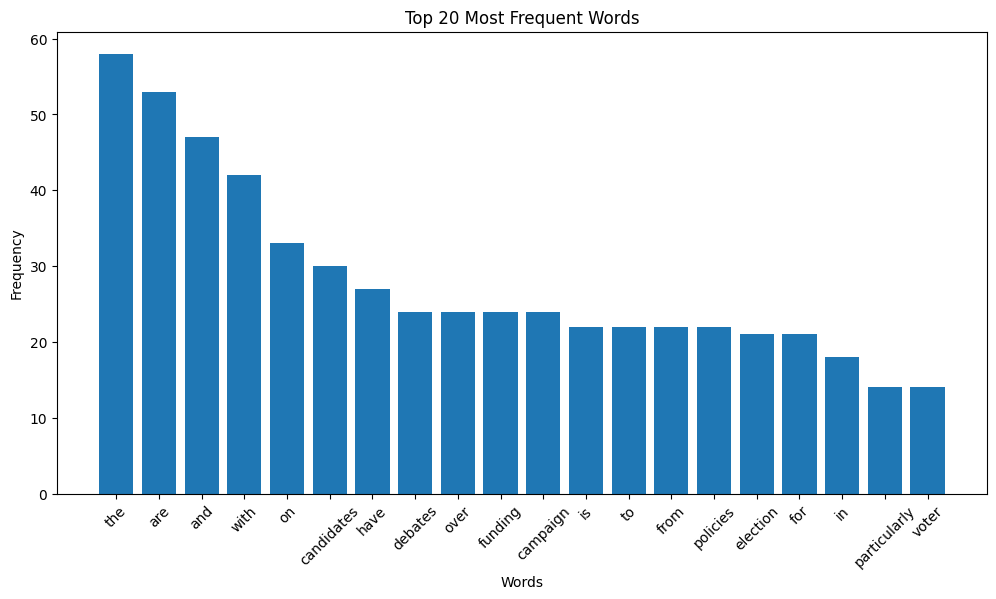

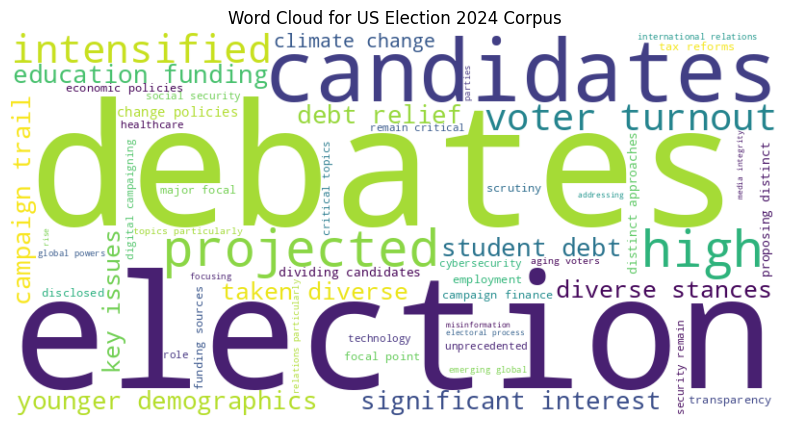

In [61]:
# Tokenize cleaned text
tokens = nltk.word_tokenize(cleaned_text)

# Word Frequency
word_counts = Counter(tokens)
common_words = word_counts.most_common(20)  # Get the 20 most common words

# Frequency Distribution Plot
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in common_words], [word[1] for word in common_words])
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for US Election 2024 Corpus")
plt.show()


**Part-of-Speech (POS) Tagging and Visualization**

<ipython-input-62-cf4c64811d07>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()), palette="viridis")


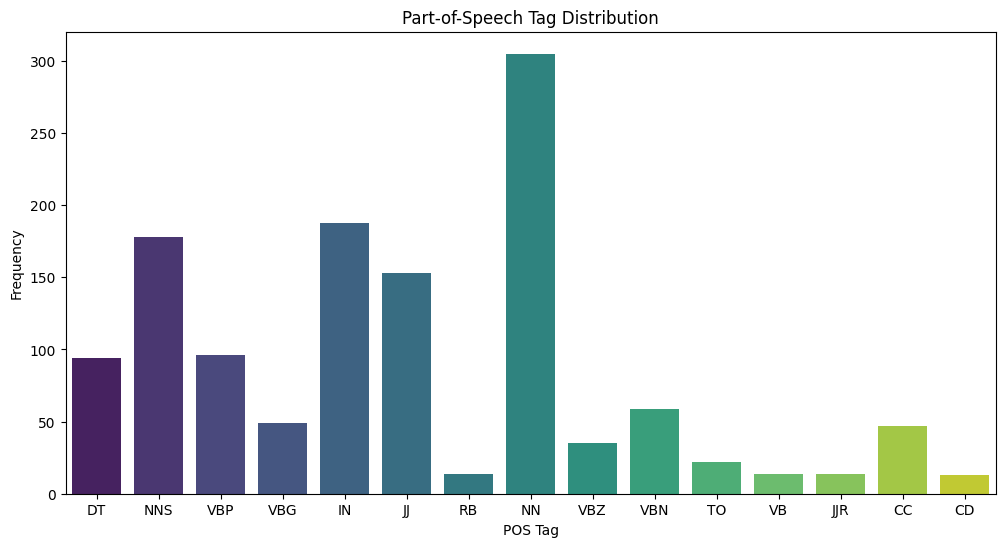

In [62]:
# POS Tagging
pos_tags = nltk.pos_tag(tokens)

# Count POS tags
pos_counts = Counter(tag for word, tag in pos_tags)

# POS Distribution Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()), palette="viridis")
plt.title("Part-of-Speech Tag Distribution")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.show()


**Top N-Grams Visualization (Bigrams and Trigrams)**

<ipython-input-63-be9aa2928dd6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Bigram", data=bigram_df, palette="magma")


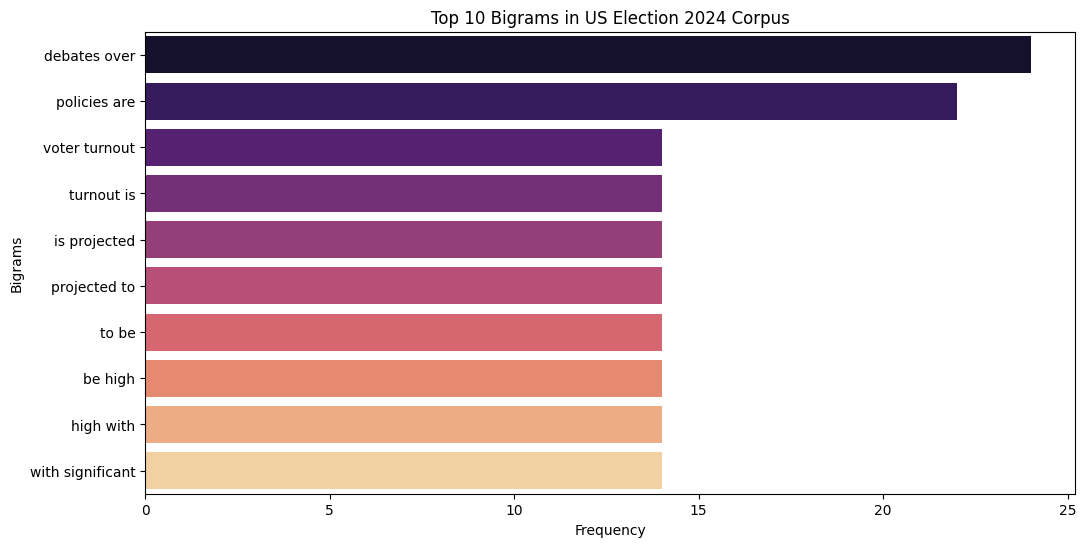

<ipython-input-63-be9aa2928dd6>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Trigram", data=trigram_df, palette="cividis")


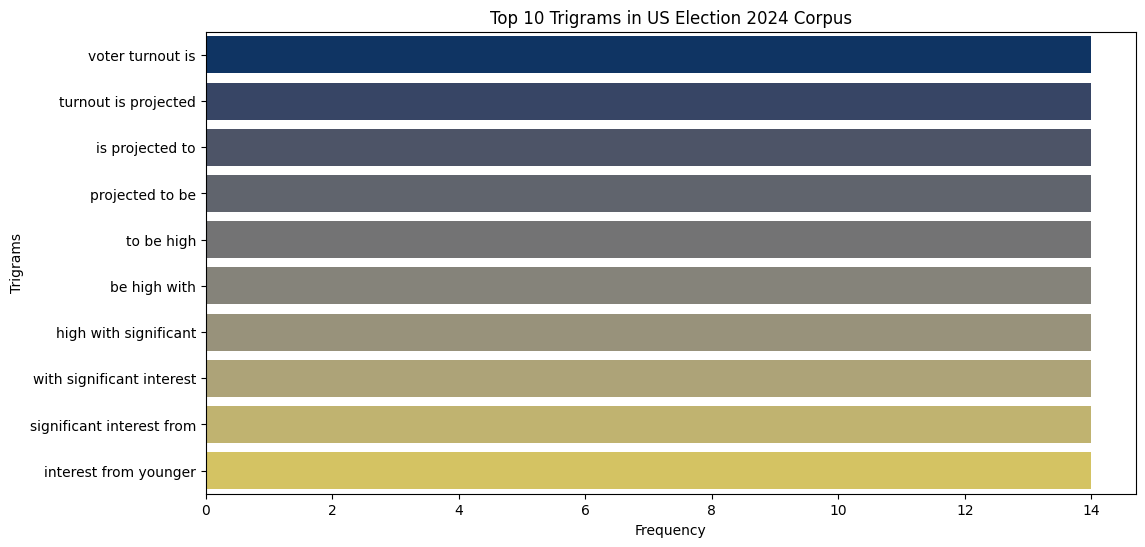

In [63]:
from nltk.util import ngrams

# Bigrams and Trigrams
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Count and visualize bigrams
bigram_counts = Counter(bigrams).most_common(10)
bigram_df = pd.DataFrame(bigram_counts, columns=["Bigram", "Frequency"])
bigram_df["Bigram"] = bigram_df["Bigram"].apply(lambda x: ' '.join(x))

plt.figure(figsize=(12, 6))
sns.barplot(x="Frequency", y="Bigram", data=bigram_df, palette="magma")
plt.title("Top 10 Bigrams in US Election 2024 Corpus")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.show()

# Count and visualize trigrams
trigram_counts = Counter(trigrams).most_common(10)
trigram_df = pd.DataFrame(trigram_counts, columns=["Trigram", "Frequency"])
trigram_df["Trigram"] = trigram_df["Trigram"].apply(lambda x: ' '.join(x))

plt.figure(figsize=(12, 6))
sns.barplot(x="Frequency", y="Trigram", data=trigram_df, palette="cividis")
plt.title("Top 10 Trigrams in US Election 2024 Corpus")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.show()


**TF-IDF for Keyword Extraction**

Top keywords by TF-IDF: [('candidates', 0.29004805527539906), ('campaign', 0.23203844422031925), ('debates', 0.23203844422031925), ('funding', 0.23203844422031925), ('policies', 0.2127019072019593), ('election', 0.20303363869277935), ('debt', 0.13535575912851955), ('demographics', 0.13535575912851955), ('education', 0.13535575912851955), ('high', 0.13535575912851955)]


<ipython-input-64-1fc17cd4e264>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TF-IDF Score", y="Keyword", data=tfidf_df, palette="viridis")


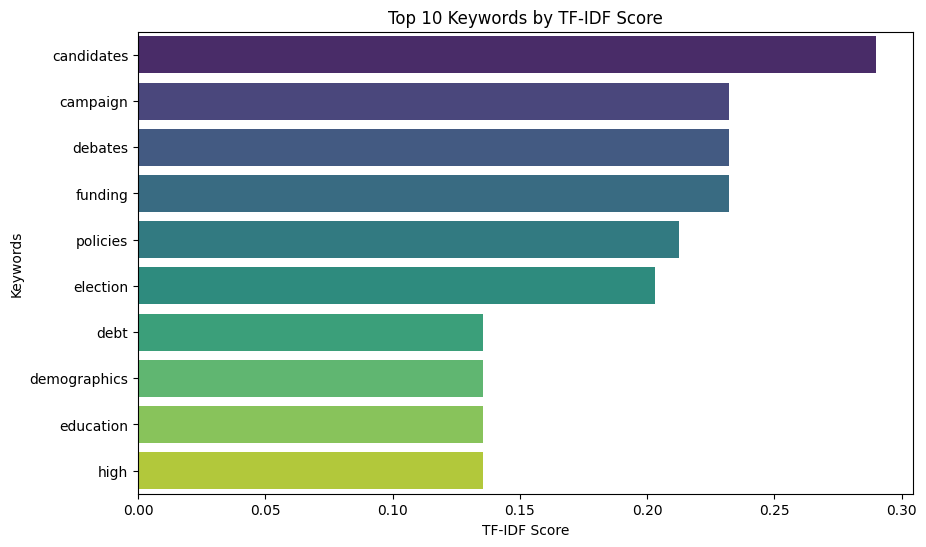

In [64]:
# Split cleaned text into sentences for analysis
sentences = nltk.sent_tokenize(cleaned_text)

# Apply TF-IDF with integer values for max_df and min_df
vectorizer = TfidfVectorizer(max_df=5, min_df=1, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sentences)
feature_names = vectorizer.get_feature_names_out()

# Find top words by TF-IDF score
tfidf_scores = zip(feature_names, tfidf_matrix.sum(axis=0).tolist()[0])
sorted_tfidf = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Display top 10 keywords
top_tfidf_words = sorted_tfidf[:10]
print("Top keywords by TF-IDF:", top_tfidf_words)

# Visualize top keywords by TF-IDF score
tfidf_df = pd.DataFrame(top_tfidf_words, columns=["Keyword", "TF-IDF Score"])
plt.figure(figsize=(10, 6))
sns.barplot(x="TF-IDF Score", y="Keyword", data=tfidf_df, palette="viridis")
plt.title("Top 10 Keywords by TF-IDF Score")
plt.xlabel("TF-IDF Score")
plt.ylabel("Keywords")
plt.show()


**Sentiment Analysis with TextBlob**

Sentiment Polarity: 0.15
Sentiment Subjectivity: 0.43


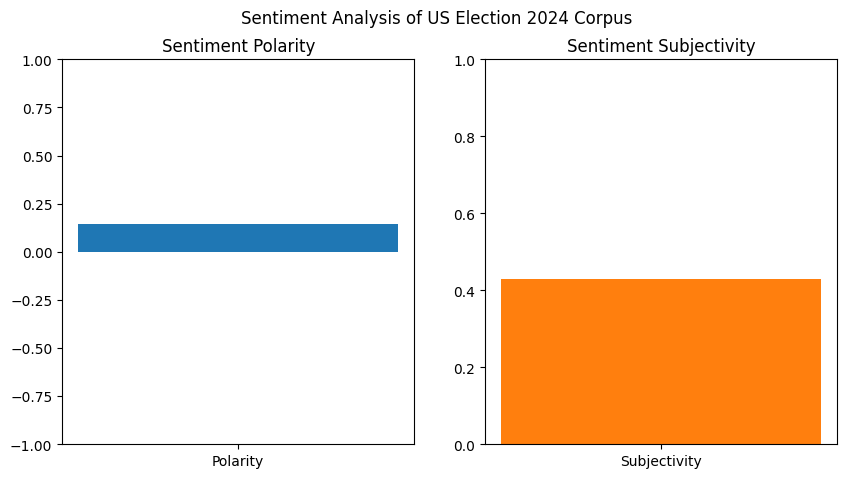

In [65]:
# Function to calculate sentiment
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Calculate sentiment for the entire corpus
polarity, subjectivity = calculate_sentiment(cleaned_text)
print(f"Sentiment Polarity: {polarity:.2f}")
print(f"Sentiment Subjectivity: {subjectivity:.2f}")

# Visualize sentiment polarity and subjectivity
plt.figure(figsize=(10, 5))

# Polarity Visualization
plt.subplot(1, 2, 1)
plt.bar(['Polarity'], [polarity], color=['#1f77b4'])
plt.ylim(-1, 1)
plt.title('Sentiment Polarity')

# Subjectivity Visualization
plt.subplot(1, 2, 2)
plt.bar(['Subjectivity'], [subjectivity], color=['#ff7f0e'])
plt.ylim(0, 1)
plt.title('Sentiment Subjectivity')

plt.suptitle("Sentiment Analysis of US Election 2024 Corpus")
plt.show()


**Save Cleaned Data**

In [66]:
# Save cleaned text to a file
with open('/content/drive/MyDrive/cleaned_us_election_2024_corpus.txt', 'w') as file:
    file.write(cleaned_text)

print("Cleaned data saved as 'cleaned_us_election_2024_corpus.txt'")


Cleaned data saved as 'cleaned_us_election_2024_corpus.txt'
